# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx

In [ ]:
!pip install python-igraph


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import igraph as ig

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# **Data Collection & Graph Representation**

In [ ]:
graph = nx.Graph()

In [ ]:
myfile = open("/content/facebook_combined.txt")

In [ ]:
with open("/content/facebook_combined.txt") as file:
    edges = [line.strip().split() for line in file]

In [ ]:
graph.add_edges_from(edges)

In [ ]:
graph = nx.Graph(edges)

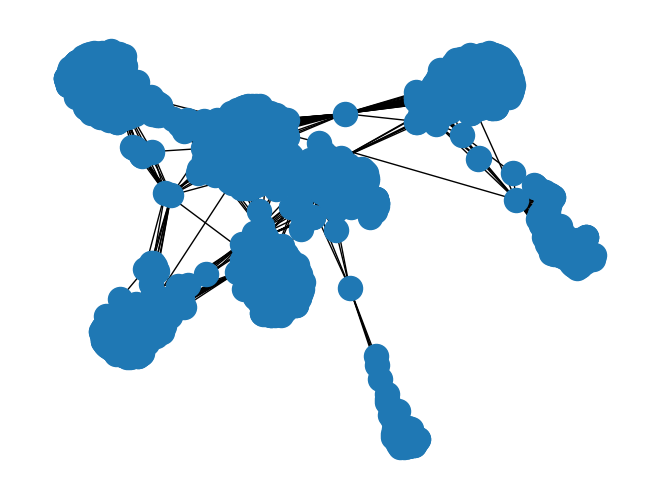

In [ ]:
nx.draw(graph)
plt.show()

# **Feature Engineering**


*   Degree of Node
*   Cardinality (of nodes connected to them)

In [ ]:
degDict = dict(graph.degree())

In [ ]:
degList = list(degDict.values())

In [ ]:
degArr = np.array(degList) # Degree of Nodes

In [ ]:
adjMatrix = nx.adjacency_matrix(graph)

In [ ]:
print(adjMatrix)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  :	:
  (4031, 4024)	1
  (4031, 4027)	1
  (4032, 1827)	1
  (4032, 4028)	1
  (4033, 1827)	1
  (4033, 3989)	1
  (4033, 4002)	1
  (4034, 1827)	1
  (4034, 4024)	1
  (4035, 1827)	1
  (4036, 1827)	1
  (4036, 4001)	1
  (4037, 1827)	1
  (4037, 3985)	1
  (4037, 4015)	1
  (4037, 4021)	1
  (4038, 1827)	1
  (4038, 1828)	1
  (4038, 1830)	1
  (4038, 4006)	1
  (4038, 4014)	1
  (4038, 4015)	1
  (4038, 4021)	1
  (4038, 4024)	1
  (4038, 4028)	1


In [ ]:
adjArr = adjMatrix.toarray()
print(adjArr)

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
adjadjT = np.array(adjMatrix).dot(np.array(adjMatrix)) # Matrix multiplication of adj matrix with it's transpose
print(adjadjT)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 18)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  :	:
  (4031, 4024)	1
  (4031, 4027)	1
  (4032, 1827)	1
  (4032, 4028)	1
  (4033, 1827)	1
  (4033, 3989)	1
  (4033, 4002)	1
  (4034, 1827)	1
  (4034, 4024)	1
  (4035, 1827)	1
  (4036, 1827)	1
  (4036, 4001)	1
  (4037, 1827)	1
  (4037, 3985)	1
  (4037, 4015)	1
  (4037, 4021)	1
  (4038, 1827)	1
  (4038, 1828)	1
  (4038, 1830)	1
  (4038, 4006)	1
  (4038, 4014)	1
  (4038, 4015)	1
  (4038, 4021)	1
  (4038, 4024)	1
  (4038, 4028)	1


In [ ]:
cs = cosine_similarity(adjArr) # Cosine Similarity

In [ ]:
cardinality = np.array(list(graph.degree()))[:, 1] # Cardinality

In [ ]:
features = np.column_stack((degArr, cardinality)) # feature matrix

# **Data Preparation**


*   Feature Scaling
*   Handling Missing Values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_features = sc.fit_transform(features)

In [ ]:
# Handling Missing Values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_features = imp.fit_transform(sc_features)

# **Clustering**


1.   Hierarchial Clustering
2.   KMeans Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusteringAlgo_1 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusterName1 = clusteringAlgo_1.fit_predict(imp_features)

In [ ]:
# using Hierarchial clustering
for node, label in zip(graph.nodes, clusterName1):
    print("this node", node, "is of cluster", label)

this node 0 is of cluster 0
this node 1 is of cluster 1
this node 2 is of cluster 1
this node 3 is of cluster 1
this node 4 is of cluster 1
this node 5 is of cluster 1
this node 6 is of cluster 1
this node 7 is of cluster 1
this node 8 is of cluster 1
this node 9 is of cluster 0
this node 10 is of cluster 1
this node 11 is of cluster 1
this node 12 is of cluster 1
this node 13 is of cluster 1
this node 14 is of cluster 1
this node 15 is of cluster 1
this node 16 is of cluster 1
this node 17 is of cluster 1
this node 18 is of cluster 1
this node 19 is of cluster 1
this node 20 is of cluster 1
this node 21 is of cluster 0
this node 22 is of cluster 1
this node 23 is of cluster 1
this node 24 is of cluster 1
this node 25 is of cluster 0
this node 26 is of cluster 0
this node 27 is of cluster 1
this node 28 is of cluster 1
this node 29 is of cluster 1
this node 30 is of cluster 1
this node 31 is of cluster 1
this node 32 is of cluster 1
this node 33 is of cluster 1
this node 34 is of clust

In [ ]:
from sklearn.cluster import KMeans
clusteringAlgo_2 = KMeans(n_clusters=2, random_state=0)
clusterName2 = clusteringAlgo_2.fit_predict(imp_features)

In [ ]:
# using KMeans clustering
for node, label in zip(graph.nodes, clusterName2):
    print("this node", node, "is of cluster", label)

this node 0 is of cluster 0
this node 1 is of cluster 1
this node 2 is of cluster 1
this node 3 is of cluster 1
this node 4 is of cluster 1
this node 5 is of cluster 1
this node 6 is of cluster 1
this node 7 is of cluster 1
this node 8 is of cluster 1
this node 9 is of cluster 1
this node 10 is of cluster 1
this node 11 is of cluster 1
this node 12 is of cluster 1
this node 13 is of cluster 1
this node 14 is of cluster 1
this node 15 is of cluster 1
this node 16 is of cluster 1
this node 17 is of cluster 1
this node 18 is of cluster 1
this node 19 is of cluster 1
this node 20 is of cluster 1
this node 21 is of cluster 1
this node 22 is of cluster 1
this node 23 is of cluster 1
this node 24 is of cluster 1
this node 25 is of cluster 1
this node 26 is of cluster 1
this node 27 is of cluster 1
this node 28 is of cluster 1
this node 29 is of cluster 1
this node 30 is of cluster 1
this node 31 is of cluster 1
this node 32 is of cluster 1
this node 33 is of cluster 1
this node 34 is of clust

# **Evaluation Metrics**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
SS1 = silhouette_score(imp_features, clusterName1)
SS2 = silhouette_score(imp_features, clusterName2)
CH1 = calinski_harabasz_score(imp_features, clusterName1)
CH2 = calinski_harabasz_score(imp_features, clusterName2)

In [ ]:
print("silhouette score for Hierarchial = ", SS1)
print("silhouette score for KMeans = ", SS2)
print("calinski-harabasz score for Hierarchial =", CH1)
print("calinski-harabasz score for KMeans =", CH2)

silhouette score for Hierarchial =  0.6599227655542753
silhouette score for KMeans =  0.7313462730723527
calinski-harabasz score for Hierarchial = 5028.480780335068
calinski-harabasz score for KMeans = 6479.069292653144
